In [1]:
from go import n

Initializing database connection...
Database connected!
Getting data took 0 minutes, 0 seconds.


In [2]:
from nbhd.geometry import *

In [3]:
tessellate??

Signature: tessellate(border_gdf_list)
Source:   
def tessellate(border_gdf_list):
    'Return tessellations from list of borders in geodataframes.'

    borders = pd.concat(border_gdf_list)
    borderlines = borders.unary_union
    polygons = polygonize(borderlines)
    tessellation = gpd.array.from_shapely(list(polygons),
                                        crs=27700)
    return gpd.GeoDataFrame(geometry=tessellation)
File:      ~/code/nbhd/geometry.py
Type:      function


In [4]:
cellularize??

Signature: cellularize(pts_geoseries, polygon)
Source:   
def cellularize(pts_geoseries, polygon):
    'Return geodataframe of Voronoi cells for points in polygon.'
    
    points = np.array([[p.x, p.y] for p in pts_geoseries])

    vor = Voronoi(points) 
    lines = [
        LineString(vor.vertices[line])
        for line in vor.ridge_vertices
        if not -1 in line
    ]
    
    lines_gdf = gpd.GeoDataFrame(geometry=gpd.GeoSeries(lines))
    lines_gdf.geometry = lines_gdf.geometry.apply(
        lambda x: MultiLineString([line for line
                                in list(split(x, polygon.boundary))
                                if polygon.buffer(1).contains(line)
                               ]))
    boundary_gdf = gpd.GeoDataFrame(geometry=gpd.GeoSeries(polygon.boundary))
    cells_gdf = tessellate([boundary_gdf, lines_gdf])
    
    return cells_gdf
File:      ~/code/nbhd/geometry.py
Type:      function


In [5]:
n.tessellate()

<AxesSubplot:>

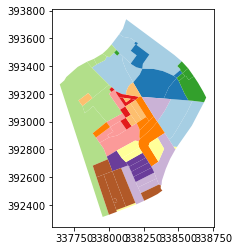

In [6]:

n.tiles.plot(cmap='Paired')

In [7]:
from mapclassify import greedy

In [8]:
n.tiles['c'] = greedy(n.tiles)

<AxesSubplot:>

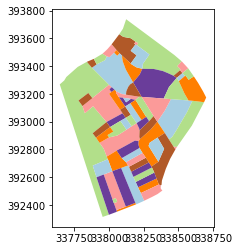

In [9]:
n.tiles.plot('c', cmap='Paired')

In [10]:
cells = cellularize(n.uprn.geometry, n.geom)

<AxesSubplot:>

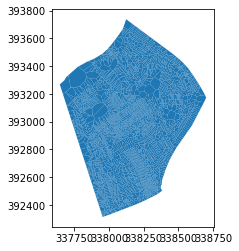

In [11]:
cells.plot()

In [12]:
cells['c'] = greedy(cells)

In [13]:
import matplotlib.pyplot as plt

In [14]:
cell_lines = gpd.GeoDataFrame(geometry=gpd.GeoSeries(cells.geometry.boundary))

<AxesSubplot:>

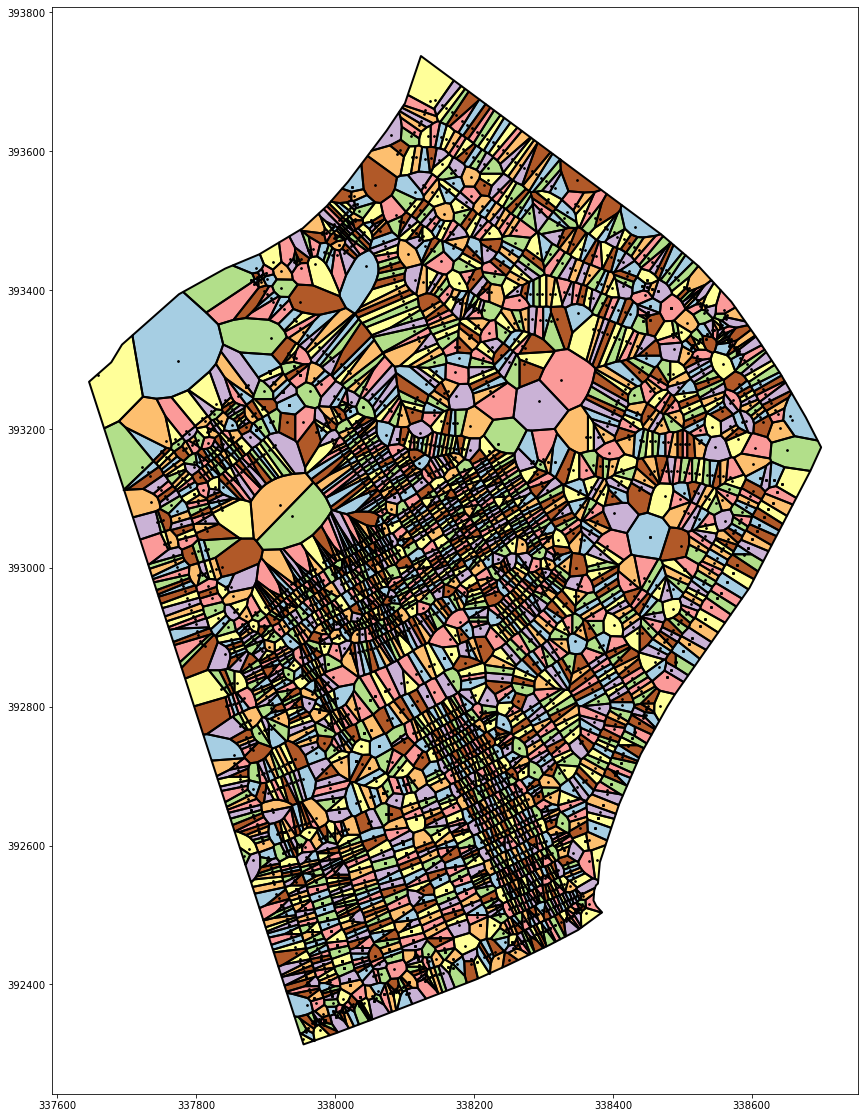

In [15]:
cmap='Paired'
fig, ax = plt.subplots(figsize=(20,20))
cells.plot('c', ax =ax, cmap=cmap)
cell_lines.plot(ax=ax,linewidth=2, color='k')
# n.roads.plot(color='k', ax=ax)
n.uprn.plot(color='k', ax=ax, markersize=3)

In [16]:
# so that appears to be working...